Importing Libs

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [30]:
df = pd.read_csv('diabetes.csv')

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.shape

(768, 9)

Plotting Each Category with Respect to Diabetes Diag

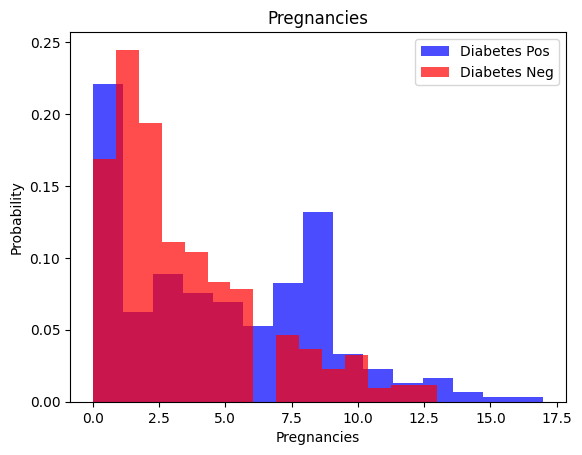

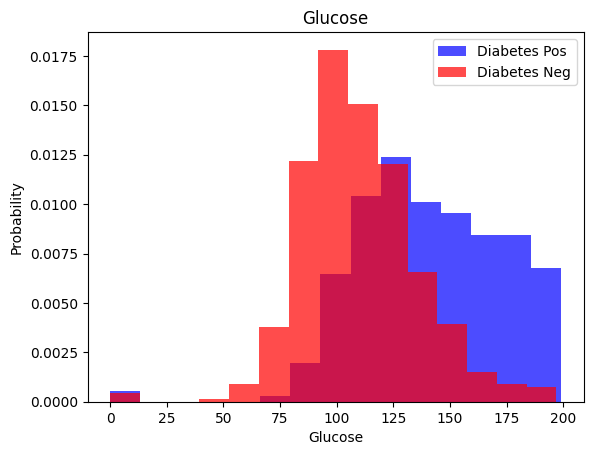

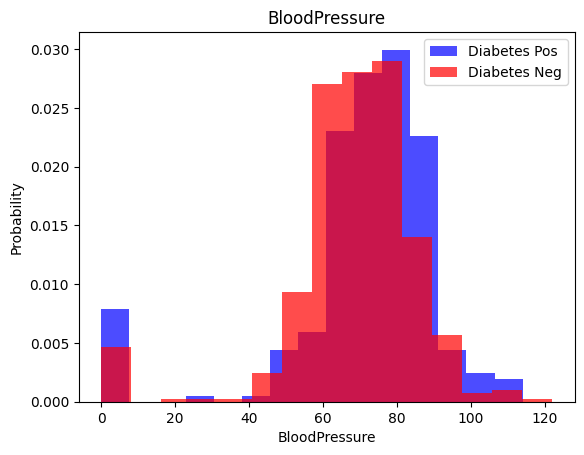

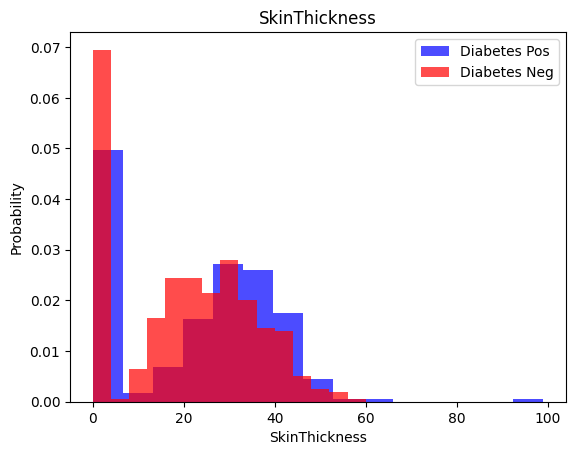

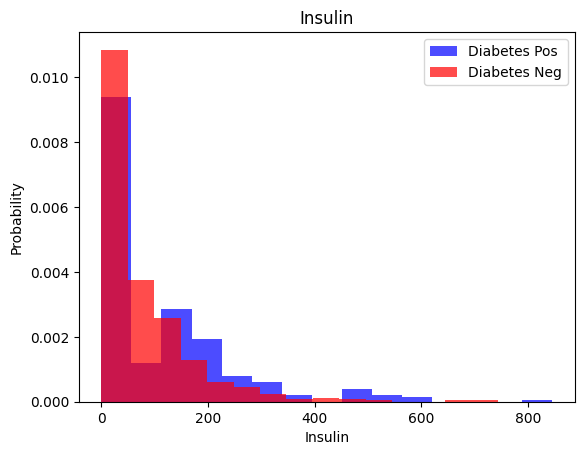

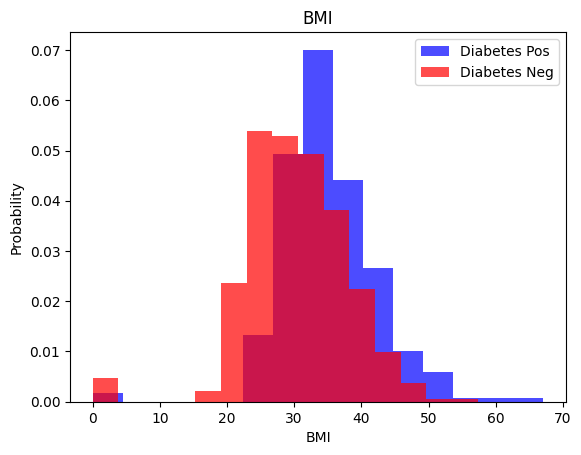

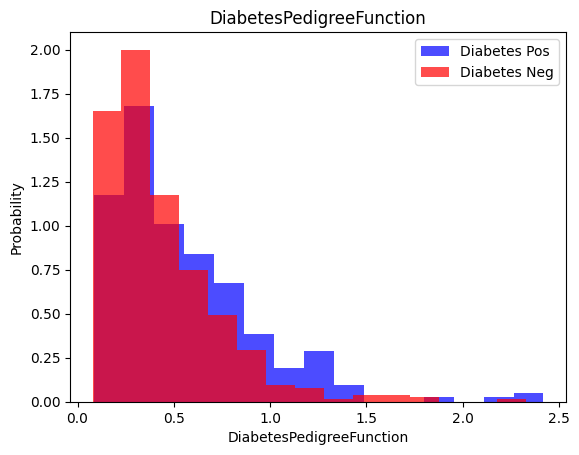

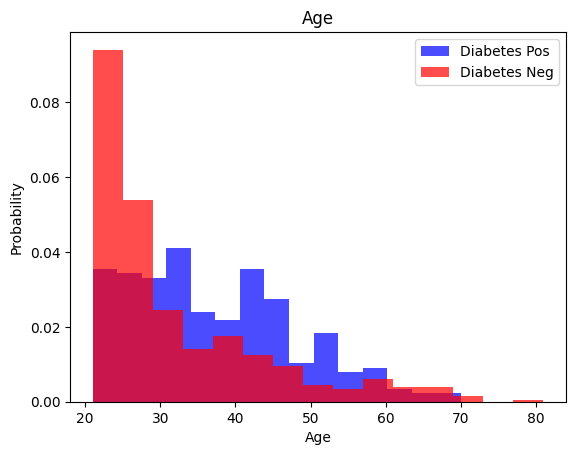

In [33]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color='blue', label='Diabetes Pos', alpha = 0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label],color='red', label='Diabetes Neg', alpha = 0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()
    
    

Splitting Data into x and y for training models

In [34]:
x = df[df.columns[:-1]].values

y = df[df.columns[-1]].values

In [35]:
import sklearn
from sklearn.model_selection import train_test_split


In [36]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [39]:
model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 555us/step - loss: 5.5442 - accuracy: 0.6065


[5.5441741943359375, 0.606521725654602]

In [40]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 0s 2ms/step - loss: 3.4477 - accuracy: 0.5761 - val_loss: 2.2168 - val_accuracy: 0.4870
Epoch 2/20
29/29 [==============================] - 0s 1ms/step - loss: 1.8337 - accuracy: 0.5239 - val_loss: 1.5921 - val_accuracy: 0.5195
Epoch 3/20
29/29 [==============================] - 0s 1ms/step - loss: 1.3632 - accuracy: 0.5761 - val_loss: 1.2192 - val_accuracy: 0.6039
Epoch 4/20
29/29 [==============================] - 0s 950us/step - loss: 1.1772 - accuracy: 0.5978 - val_loss: 1.0475 - val_accuracy: 0.6429
Epoch 5/20
29/29 [==============================] - 0s 938us/step - loss: 1.0526 - accuracy: 0.6196 - val_loss: 0.9890 - val_accuracy: 0.6364
Epoch 6/20
29/29 [==============================] - 0s 948us/step - loss: 1.0130 - accuracy: 0.6196 - val_loss: 0.9159 - val_accuracy: 0.6299
Epoch 7/20
29/29 [==============================] - 0s 985us/step - loss: 0.9297 - accuracy: 0.6304 - val_loss: 0.9432 - val_accuracy: 0.6039
Epoch 8/20
2

Cleaning Up the Scale of Data Used(Insulin Values are 0-800, skin thickness is 0-2.5)

In [42]:
X_1 = df[df.columns[:-1]].values

Y_1 = df[df.columns[-1]].values

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)

Reshaping and Plotting Data to show the new value ranges(Insulin -.5-7)

In [44]:
data = np.hstack((X_1, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

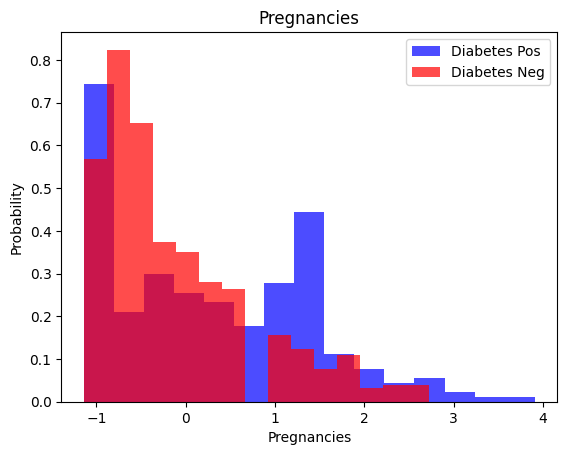

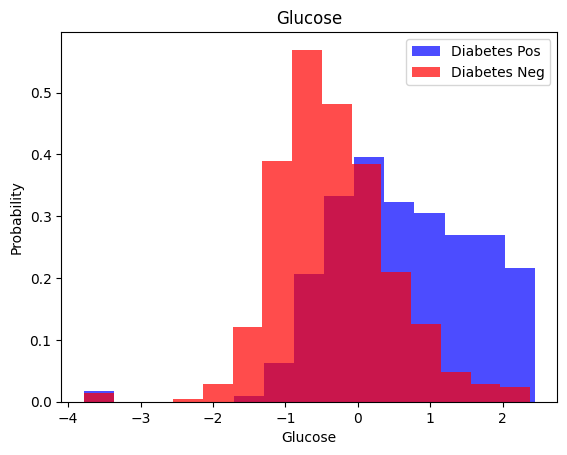

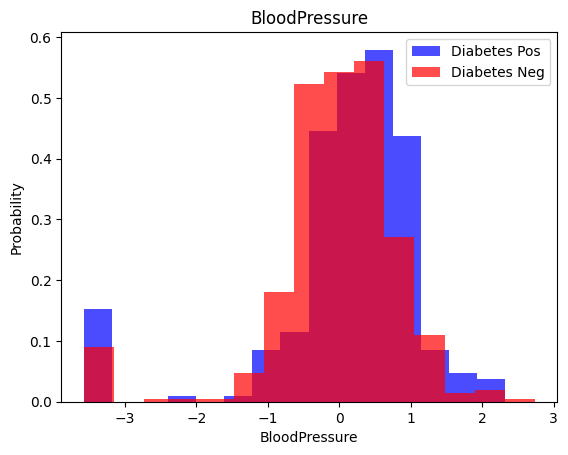

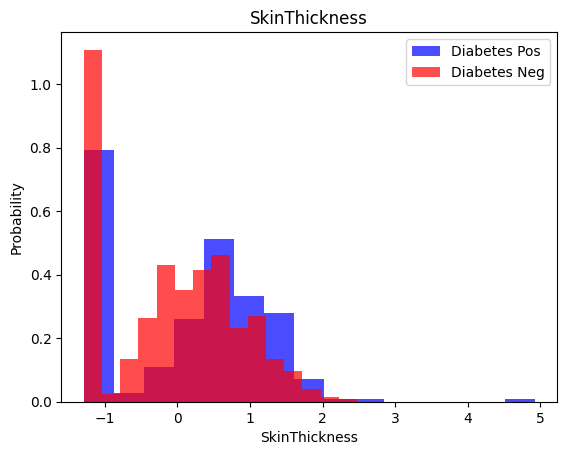

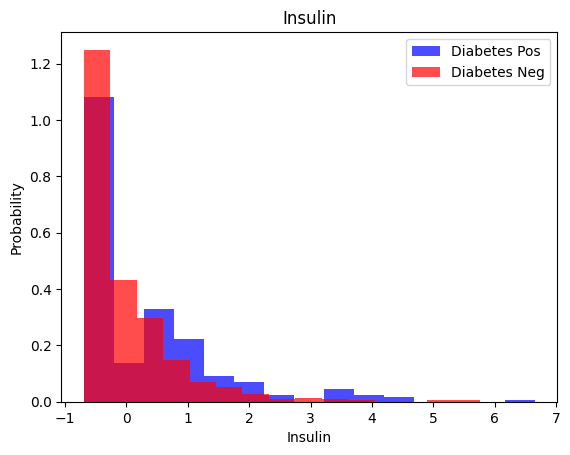

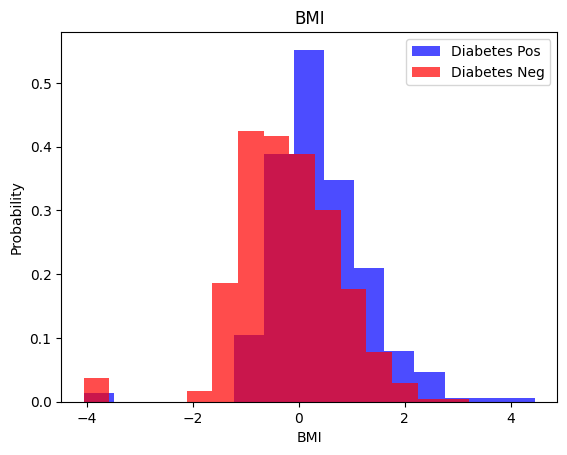

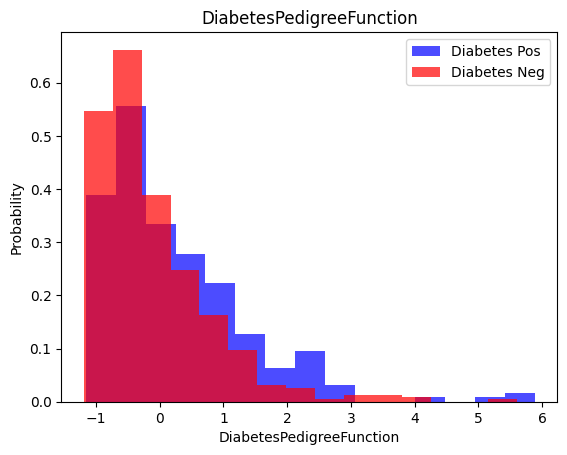

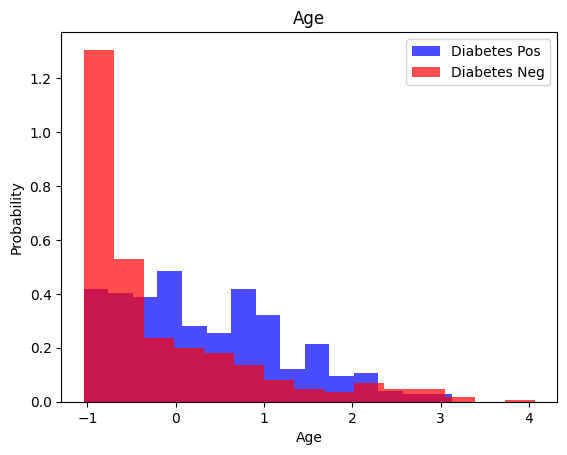

In [46]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue', label='Diabetes Pos', alpha = 0.7, density=True, bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red', label='Diabetes Neg', alpha = 0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()